<b>NEXTDEV</b> Digitalent Academy : Python Assignment 1 - Data Visualization<br>
Lecture : <strong> Afif A.I. </strong> <br>
code by : <strong>Wahyu Fachrur Zulfikar</strong>

In [86]:
import numpy as np
import pandas as pandas
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## <b>Pendahuluan</b>

Dataset `Household Power Consumption` adalah dataset yang mengumpulkan data pemakaian listrik dalam rumah tangga dengan sampling rate setiap 1 menit yang dikumpulkan selama 4 tahun dari tahun 16 Desember 2006 - 26 November 2010. selain data pemakaian listrik, data ini juga menyajikan data tegangan dan arus yang dideteksi pada waktu tersebut.
<br>
<br>
Jika dilihat lebih dalam, maka pada dataset di tempat ini menggunakan sumber listrik ac dengan tegangan standart sebesar 240V, dan untuk memastikan bahwa data tersebut sudah siap untuk diproses, maka kita perlu menganalisa mengenai min, max, dan simpangan rata" pada masing-masing Feature, karena dataset pada kali ini menggunakan tipedata dalam bentuk numerik.

Dalam dataset kali ini berisi mengenai data-berbagai data perhitungan mengenai jumlah konsumsi listrik tiap waktu. untuk penjelasan mengenai data Feature yang ada, antara lain:

Feature | Description
---|---
Date | Tanggal dalam bentuk format `dd/mm/yyyy`
Time | Waktu dalam bentuk format `hh:mm:ss`
Global_active_power | Daya aktif rata-rata/menit yang dihasilkan oleh rumah tangga secara global (disajikan dalam satuan <u><b>KiloWatt</b></u>)
Global_reactive_power | Daya reaktif rata-rata/menit yang dihasilkan oleh rumah tangga secara global (disajikan dalam satuan <u><b>KiloVar</b></u>)
Voltage | Tegangan Rata-rata/menit dengan satuan <u><b>Volt</b></u>
Global_intensity | Arus listrik Rata-rata/menit dengan satuan <u><b>Ampere</b></u>
sub_metering_1 | pengukuran daya yang berhubungan dengan <u><i>Dishwasher, Oven, dan Microwaves</i><u>
sub_metering_2 | pengukuran daya yang berhubungan dengan <u><i>laundry room, washing-machine, tumble-drier, refrigerator & light.</i><u>
sub_metering_3 | pengukuran daya yang berhubungan dengan <u><i>electric water-heater, air-conditioner.</i><u>

------------

This archive contains 2075259 measurements gathered between December 2006 and November 2010 (47 months).
Notes: <br><br>
>1. <b>(globalactivepower*1000/60 - submetering1 - submetering2 - submetering3)</b> represents the active energy consumed every minute (in watt hour) in the household by electrical equipment not measured in sub-meterings 1, 2 and 3. <br>

>2. The dataset contains some missing values in the measurements (nearly 1,25% of the rows). All calendar timestamps are present in the dataset but for some timestamps, the measurement values are missing: a missing value is represented by the absence of value between two consecutive semi-colon attribute separators. For instance, the dataset shows missing values on April 28, 2007.

In [87]:
df_power = pandas.read_csv("household_power_consumption.txt", sep=";", low_memory=False)
df_power.fillna(0, inplace=True)
df_power.dropna(axis=0, inplace=True, how='any')
df_power["Datetime"] = df_power["Date"] + " " + df_power["Time"]
df_power.drop(labels=["Date", "Time"], axis=1, inplace=True)

In [88]:
df_power["Datetime"] = pandas.to_datetime(df_power["Datetime"], errors="coerce", format="%d/%m/%Y %H:%M:%S", dayfirst = True)

numer = ['Global_active_power','Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']
for col in numer:
    df_power[col] = pandas.to_numeric(df_power[col], errors='coerce')

df_power["Other_active_metering"] = df_power["Global_active_power"]*1000/60 - df_power["Sub_metering_1"] - df_power["Sub_metering_2"] - df_power["Sub_metering_3"]
df_power.dropna(axis=0, inplace=True, how='any')

df_power.reset_index(inplace=True)
df_power.drop(labels=["index"], axis=1, inplace=True)

df_power.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2049280 entries, 0 to 2049279
Data columns (total 9 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   Global_active_power    float64       
 1   Global_reactive_power  float64       
 2   Voltage                float64       
 3   Global_intensity       float64       
 4   Sub_metering_1         float64       
 5   Sub_metering_2         float64       
 6   Sub_metering_3         float64       
 7   Datetime               datetime64[ns]
 8   Other_active_metering  float64       
dtypes: datetime64[ns](1), float64(8)
memory usage: 140.7 MB


In [89]:
df_power.describe()
df_power[df_power["Global_active_power"].isna()]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Other_active_metering


In [90]:
new_df_power = df_power.drop("Datetime", axis=1)

In [91]:
df_power.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Other_active_metering
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00,9.314693e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00,9.585916e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-2.400000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.800000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.500000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,1.036667e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,1.248333e+02


In [92]:
new_df_power.describe()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Other_active_metering
count,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06,2.049280e+06
mean,1.091615e+00,1.237145e-01,2.408399e+02,4.627759e+00,1.121923e+00,1.298520e+00,6.458447e+00,9.314693e+00
std,1.057294e+00,1.127220e-01,3.239987e+00,4.444396e+00,6.153031e+00,5.822026e+00,8.437154e+00,9.585916e+00
min,7.600000e-02,0.000000e+00,2.232000e+02,2.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,-2.400000e+00
25%,3.080000e-01,4.800000e-02,2.389900e+02,1.400000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.800000e+00
50%,6.020000e-01,1.000000e-01,2.410100e+02,2.600000e+00,0.000000e+00,0.000000e+00,1.000000e+00,5.500000e+00
75%,1.528000e+00,1.940000e-01,2.428900e+02,6.400000e+00,0.000000e+00,1.000000e+00,1.700000e+01,1.036667e+01
max,1.112200e+01,1.390000e+00,2.541500e+02,4.840000e+01,8.800000e+01,8.000000e+01,3.100000e+01,1.248333e+02


<AxesSubplot:>

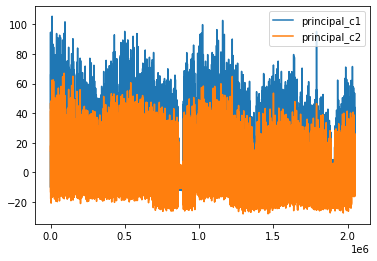

In [93]:
pca = PCA(n_components=2)

principalComponent = pca.fit_transform(new_df_power)
principalDf = pandas.DataFrame(data=principalComponent, columns=["principal_c1", "principal_c2"])
principalDf.plot()

In [94]:
kmeans = KMeans(n_clusters=5)
kmeans.fit(new_df_power)

KMeans(n_clusters=5)

In [95]:
print(len(kmeans.labels_))

2049280


In [96]:
pandas.DataFrame(kmeans.labels_)
# df_power.reset_index(inplace=True)
# df_power.drop(labels="index",axis=1, inplace=True)
df_power.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Other_active_metering
2049275,0.946,0.0,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00,15.766667
2049276,0.944,0.0,240.00,4.0,0.0,0.0,0.0,2010-11-26 20:59:00,15.733333
2049277,0.938,0.0,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00,15.633333
2049278,0.934,0.0,239.70,3.8,0.0,0.0,0.0,2010-11-26 21:01:00,15.566667
2049279,0.932,0.0,239.55,3.8,0.0,0.0,0.0,2010-11-26 21:02:00,15.533333


## <b> Visualisasi data dengan Scatter Plot</b>
>Pada visualisasi kali ini, kita akan menggunakan scatter plot 2D dengan 2 metode, yaitu plotting dengan datarame asli dan plotting menggunakan data yang sudah direduksi dimensi oleh PCA.

#### Visualisasi data dengan menggunakan feature asli dari dataset

In [97]:
# Hapus comment untuk mengaktifkan kode untuk visualisasi
# for x in range(len(new_df_power.columns)): 
#     for y in range(x+1, len(new_df_power.columns)):
#         plt.scatter(new_df_power.iloc[:,x], new_df_power.iloc[:,y], c=kmeans.labels_[:], cmap= 'rainbow_r')
#         plt.xlabel(f"{new_df_power.columns[x]}")
#         plt.ylabel(f"{new_df_power.columns[y]}")
#         plt.title(f"{new_df_power.columns[x]} vs {new_df_power.columns[y]}")
#         plt.show()

#### Visualisasi data dengan menggunakan feature yang sudah direduksi menggunakan PCA

In [98]:
# Hapus comment untuk mengaktifkan kode untuk visualisasi

# ax=0
# ay=1

# plt.scatter(principalDf.iloc[:, ax], principalDf.iloc[:, ay], c=kmeans.labels_, cmap= 'rainbow_r')
# plt.xlabel("x")
# plt.ylabel("y")
# plt.title("Principal Component")
# plt.show()

In [99]:
df_power["label"]= pandas.DataFrame(kmeans.labels_)
df_power.tail()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Datetime,Other_active_metering,label
2049275,0.946,0.0,240.43,4.0,0.0,0.0,0.0,2010-11-26 20:58:00,15.766667,1
2049276,0.944,0.0,240.00,4.0,0.0,0.0,0.0,2010-11-26 20:59:00,15.733333,1
2049277,0.938,0.0,239.82,3.8,0.0,0.0,0.0,2010-11-26 21:00:00,15.633333,1
2049278,0.934,0.0,239.70,3.8,0.0,0.0,0.0,2010-11-26 21:01:00,15.566667,1
2049279,0.932,0.0,239.55,3.8,0.0,0.0,0.0,2010-11-26 21:02:00,15.533333,1


In [100]:
import pickle

with open("cluster_kmeans_model.pkl", "wb") as cluster_file:
    pickle.dump(kmeans, cluster_file)

In [101]:
with open("cluster_kmeans_model.pkl", "rb") as file:
    clustering_kmeans = pickle.load(file)

In [102]:
new_df_power.loc[500:1000, :]

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Other_active_metering
500,2.528,0.122,242.92,10.4,0.0,37.0,0.0,5.133333
501,2.668,0.140,241.80,11.6,0.0,18.0,0.0,26.466667
502,4.256,0.184,240.29,17.8,0.0,30.0,0.0,40.933333
503,4.126,0.244,240.61,17.6,0.0,28.0,0.0,40.766667
504,3.216,0.270,242.14,15.0,0.0,31.0,0.0,22.600000
...,...,...,...,...,...,...,...,...
996,2.292,0.054,238.03,9.6,0.0,0.0,0.0,38.200000
997,0.370,0.000,240.26,2.4,0.0,0.0,0.0,6.166667
998,0.472,0.000,240.15,2.4,0.0,0.0,0.0,7.866667
999,3.054,0.060,237.55,13.4,0.0,0.0,18.0,32.900000


In [103]:
# new_data = pandas.DataFrame([[1.360, 0.436, 233.63, 23, 30, 80, 30, 200]], columns=new_df_power.columns)
p1 = 10.500 
p2 = 0.1
p3 = 240
p4 = 10
p5 = 20 #sub_1
p6 = 0 #sub_2
p7 = 12 #sub_3
p8 = p1*1000/60 - p5 - p6 - p7
new_data = [[p1,p2,p3,p4,p5,p6,p7,p8]]
predicted = clustering_kmeans.predict(new_data)
print(predicted, f"hasil other: {p8}")

[0] hasil other: 143.0


In [104]:

# Hapus comment untuk mengaktifkan kode untuk visualisasi
# for x in range(len(new_df_power.columns)): 
#     for y in range(x+1, len(new_df_power.columns)):
#         plt.scatter(new_data.iloc[:,x], new_data.iloc[:,y], c=predicted, cmap= 'rainbow_r')
#         plt.xlabel(f"{new_df_power.columns[x]}")
#         plt.ylabel(f"{new_df_power.columns[y]}")
#         plt.title(f"{new_df_power.columns[x]} vs {new_df_power.columns[y]}")
#         plt.show()